# Titanic Passanger Survival Analysis

In [128]:
from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

# Data Import and Loading

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("train.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Study

In [131]:
print("shape of the data is :", df.shape)

shape of the data is : (891, 12)


#### Checking data types and missing values to guide cleaning.

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [133]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [134]:
print("null values in the data :")
df.isnull().sum()

null values in the data :


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Data Visualization

In [135]:
def bar_plot(data, feature) :
    survived = data[data["Survived"] == 1][feature].value_counts()
    dead = data[data["Survived"] == 0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    print("Survived :\n", survived)
    print("Dead:\n", dead)
    df.plot(kind="bar", stacked = True, figsize=(4, 3), colormap='Set2')
    plt.title(f"Survival Counts by {feature}")
    plt.xlabel(feature)
    plt.ylabel("Number of Passengers")
    plt.xticks(rotation=0)
    plt.legend()
    plt.tight_layout()
    plt.show()

Survived :
 Sex
female    233
male      109
Name: count, dtype: int64
Dead:
 Sex
male      468
female     81
Name: count, dtype: int64


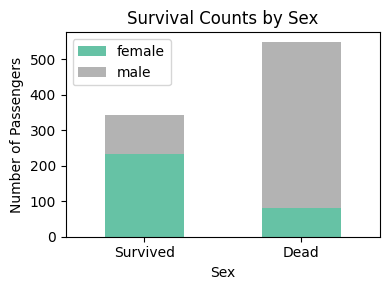

Survived :
 Pclass
1    136
3    119
2     87
Name: count, dtype: int64
Dead:
 Pclass
3    372
2     97
1     80
Name: count, dtype: int64


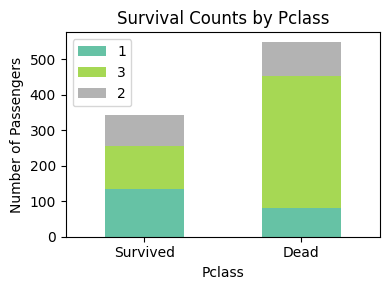

Survived :
 SibSp
0    210
1    112
2     13
3      4
4      3
Name: count, dtype: int64
Dead:
 SibSp
0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: count, dtype: int64


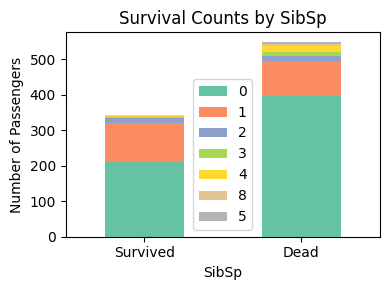

Survived :
 Parch
0    233
1     65
2     40
3      3
5      1
Name: count, dtype: int64
Dead:
 Parch
0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: count, dtype: int64


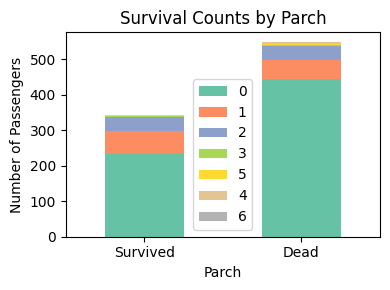

Survived :
 Embarked
S    217
C     93
Q     30
Name: count, dtype: int64
Dead:
 Embarked
S    427
C     75
Q     47
Name: count, dtype: int64


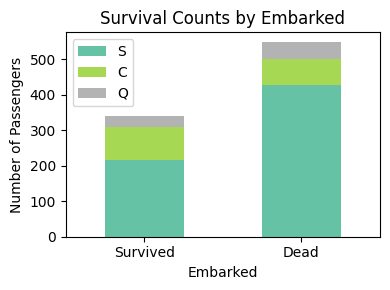

In [136]:
features = ["Sex", "Pclass", "SibSp", "Parch", "Embarked"]
for col in features:
    bar_plot(df, col)

### Summary of the Data
Females are more likely survivied than Males.

Class 1 survived the more than other classes
Class 3 are more likely to be dead

People aboarded with more than 2 siblings or spouse more likely survived.
People aboarded without siblings or spouse are more likely to be dead

Passengers with no family (SibSp = 0) were most common and had high mortality (398 died, 210 survived).
Passengers with 1 sibling/spouse had a relatively better chance of survival (112 survived vs. 97 died).

Having a large number of siblings/spouses (≥3) strongly correlates with lower survival.

The Chart confirms a person aboarded from C slightly more likely survived.
The Chart confirms a person aboarded from Q more likely dead.
The Chart confirms a person aboarded from S more likely dead.

### In Short
Women, the wealthy, and those with close family had the best chance of survival.

Men, 3rd Class travelers, and those alone or in big families were at higher risk.

# Feature Engineering

Creating new input features or modifying existing ones to improve the performance of the machine learning model.

### Extracting Titles from Name to get their social status.

In [6]:
df["Title"] = df["Name"].str.extract('([A-Za-z]+)\.', expand = False)

In [138]:
print("Data: \n",
    df["Title"].value_counts())

Data: 
 Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64


In [7]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 'Master': 3,
                 "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }

df['Title'] = df["Title"].map(title_mapping)

In [140]:
df.drop(columns="Name", inplace = True)

Survived :
 Title
1    127
2     99
0     81
3     35
Name: count, dtype: int64
Dead:
 Title
0    436
1     55
3     32
2     26
Name: count, dtype: int64


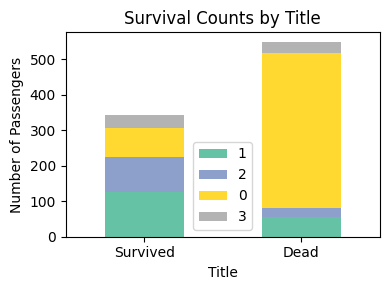

In [141]:
bar_plot(df, "Title")

### Interpretation
Women (Miss, Mrs) had the highest survival rates.

Men (Mr) had the lowest survival rate.

Rare titles and children (Master) had mixed outcomes — some survived, but also dead.

### Sex Mapping

In [142]:
sex_mapping = {"female" : 0, 'male': 1}

df["Sex"] = df["Sex"].map(sex_mapping)

In [143]:
df.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1


### Filling up NaN values in Age column and Binning age in groups

In [8]:
df["Age"] = df["Age"].fillna(df.groupby("Title")["Age"].transform("median"))

df["Age"].isnull().sum()

0

C:\Users\91982\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91982\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\91982\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\91982\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_c

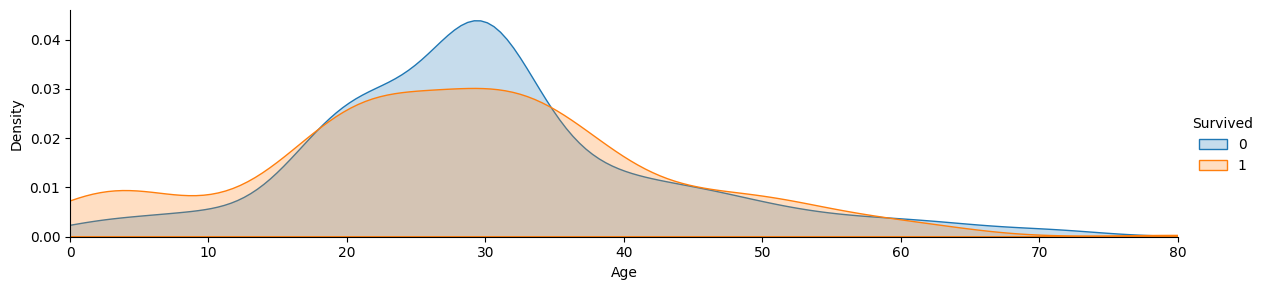

In [145]:
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend() 
plt.show()

Those who were 25-35 years old were more dead and more survived.

In [146]:
def age_groups(age):
    if age <= 16:
        return 0  # Child
    elif age <= 26:
        return 1  # Young Adult
    elif age <= 36:
        return 2  # Adult
    elif age <= 62:
        return 3  # Middle Aged
    else:
        return 4  # Senior


df["Age Group"] = df["Age"].apply(age_groups)

Survived :
 Age Group
2    116
1     97
3     69
0     57
4      3
Name: count, dtype: int64
Dead:
 Age Group
2    220
1    158
3    111
0     48
4     12
Name: count, dtype: int64


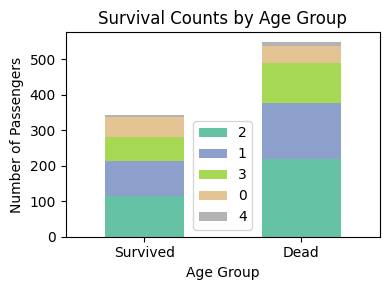

In [147]:
bar_plot(df, "Age Group")

### Interpretation
Younger passengers (age ≤ 16) had a higher survival rate, while survival decreased with age. Middle-aged and older passengers were less likely to survive. 
##### This matches the historical “women and children first” pattern.

### Mapping & Filling Null values in Embarked Feature

In [148]:
emb_mapping = {'S': 0, 'C': 1, 'Q': 2}

df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0]).map(emb_mapping)

In [149]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
Age Group        0
dtype: int64

### Mapping & Filling Null values in Cabin Feature

In [150]:
df["Cabin"] = df["Cabin"].fillna("Missing").str[0]

#### Since there are Categorical values, we use Encoding for transforming them into numerical

In [151]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

df["Cabin"] = encoder.fit_transform(df["Cabin"])

In [152]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Title          0
Age Group      0
dtype: int64

### Family mapping 
Since, "SibSp" and "Parch" represents related information: your family on board.

If it is used as-is then the model will treats them as independent features, even though they both desctibes the same thing(family).
This could reduce the Performance.

In [153]:
def family_size_group(n):
    if n == 1:
        return 0
    elif n <= 3:
        return 1
    elif n <= 6:
        return 2
    else:
        return 3

In [154]:
df["Family Size"] = df["SibSp"] + df["Parch"] + 1  # we add 1 for the passenger

df["Family Size Group"] = df["Family Size"].apply(family_size_group)

Survived :
 Family Size Group
0    163
1    148
2     27
3      4
Name: count, dtype: int64
Dead:
 Family Size Group
0    374
1    115
2     39
3     21
Name: count, dtype: int64


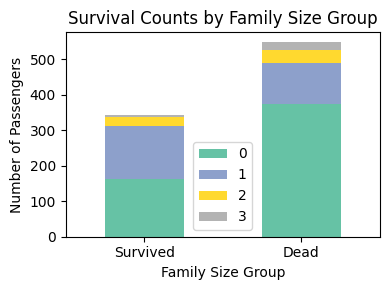

In [155]:
bar_plot(df, "Family Size Group")

Passengers traveling alone (Group 0) had the lowest survival rate (30%), while those with small families (2–4 members, Group 1) had the highest (56%).

Larger families (Groups 2 & 3) showed decreasing survival rates, likely due to challenges in staying together during evacuation.

### Creating fare per person

In [156]:
df["Fare per Person"] = df["Fare"] / df["Family Size"]

### Create is alone feature

In [157]:
df['IsAlone'] = (df['Family Size'] == 1).astype(int)

### Removing Unneccessary Columns

In [158]:
df.drop(columns=['PassengerId', 'Ticket', 'SibSp', 'Parch', 'Age', 'Fare', 'Family Size'], inplace=True)

In [159]:
df.head(3)

,Survived,Pclass,Sex,Cabin,Embarked,Title,Age Group,Family Size Group,Fare per Person,IsAlone
0,0,3,1,7,0,0,1,1,3.62500,0
1,1,1,0,2,1,2,3,1,35.64165,0
2,1,3,0,7,0,1,1,0,7.92500,1


# Spliting the Data

In [160]:
X = df.drop(columns="Survived")
y = df["Survived"]

We use scaling to standardize feature values so models can learn more effectively and converge faster.

In [161]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [162]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=485, stratify = y)

# Modeling

### We are selecting the best model
Comparing models using 10-fold cross-validation for robustness.

In [163]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### Cross Validation(k-fold)

In [164]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [165]:
models = [
    ("Random Forest", RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=4, class_weight='balanced', random_state=12)),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier(class_weight='balanced', random_state=10)),
    ("Naive Bayes", GaussianNB()),
    ("SVM", SVC(probability=True, class_weight='balanced', random_state=10)),
    ("GBG", GradientBoostingClassifier(n_estimators=100, random_state=10))
]

for name, model in models:
    score = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    print(f"Average Accuracy of {name} model is :, {score.mean():.4f}")


Average Accuracy of Random Forest model is :, 0.8272
Average Accuracy of KNN model is :, 0.7992
Average Accuracy of Decision Tree model is :, 0.7794
Average Accuracy of Naive Bayes model is :, 0.7754
Average Accuracy of SVM model is :, 0.8244
Average Accuracy of GBG model is :, 0.8216


### Random Forest Classifier is Working better

In [166]:
RFC = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=4, class_weight='balanced', random_state=10)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

# Evalution of the Model

In [167]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.75      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.82      0.82      0.82       179



The Confusion Matrix is as :

 [[94 16]
 [17 52]] 




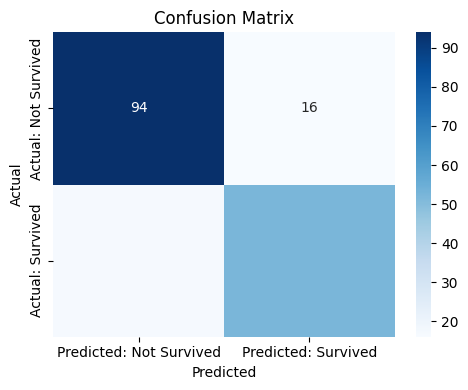

In [168]:
conf_mat = confusion_matrix(y_test, y_pred)

print("The Confusion Matrix is as :\n\n",conf_mat, "\n\n")
plt.figure(figsize=(5, 4))  
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted: Not Survived', 'Predicted: Survived'],
            yticklabels=['Actual: Not Survived', 'Actual: Survived'])

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Conclusion 

### Model Performance Summary
The machine learning model built to predict Titanic passenger survival performs reasonably well, achieving an overall accuracy of 82%. It shows particularly strong results in identifying passengers who did not survive (class 0), with both precision and recall scores of 85%. This means when the model predicts someone didn't survive, it's correct 85% of the time, and it successfully identifies 85% of all actual non-survivors.

However, the model is slightly less effective at predicting survivors (class 1). While it still maintains decent performance with 76% precision and 75% recall, this indicates room for improvement. The model misses about 25% of actual survivors, incorrectly labeling them as non-survivors.

The confusion matrix shows:

True Negatives (94): Correctly predicted non-survivors (model said "died" and they actually died).
False Positives (16): Incorrectly predicted as survivors (model said "survived" but they actually died).
False Negatives (17): Incorrectly predicted as non-survivors (model said "died" but they actually survived).
True Positives (52): Correctly predicted survivors (model said "survived" and they did).

Overall, the model demonstrates that machine learning can effectively uncover patterns in historical survival data, with women, children, and higher-class passengers being more likely to survive - findings that align with known historical accounts of the disaster. The current implementation provides a solid foundation that could be enhanced with more sophisticated techniques.